# Exercises

## Regression

* [Linear Regression](#1.)
* [Support Vector Regression](#2.)


## Classification

* [K-Nearest Neighbour (KNN) Classification](#3.)
* [Support Vector Machine (SVM) Classification](#4.)


## Clustering

* [K-Means Clustering](#5.)


## Other Content

* [Principal Component Analysis (PCA)](#6.)

# Exercise 1: Regression
<a class="anchor" id="1."></a> 
## Linear Regression

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('C:\\Users\\media\\Desktop\\python-for-finance\\python-for-finance\\day_07\\data\\linear-regression-dataset.csv')

### 1. Print info and first 5 rows

- Expected output:
```python
>>> <class 'pandas.core.frame.DataFrame'>
>>> RangeIndex: 14 entries, 0 to 13
>>> Data columns (total 2 columns):
>>>  #   Column   Non-Null Count  Dtype  
>>> ---  ------   --------------  -----  
>>> 0   experience  14 non-null     float64
>>> 1   salary      14 non-null     int64  
>>> dtypes: float64(1), int64(1)
>>> memory usage: 352.0 bytes
>>> None
>>>   experience  salary
>>> 0      0.5  2500
>>> 1      0.0  2250
>>> 2      1.0  2750
>>> 3      5.0  8000
>>> 4      8.0  9000
```

In [3]:
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   experience  14 non-null     float64
 1   salary      14 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 352.0 bytes


,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


### 2. Plot deneyim data

- Expected output:
![experience1](../data/experience1.png)

C:\Users\media\AppData\Local\Temp/ipykernel_38328/2681073929.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(data['experience'],data['salary'],"ro",color='b')


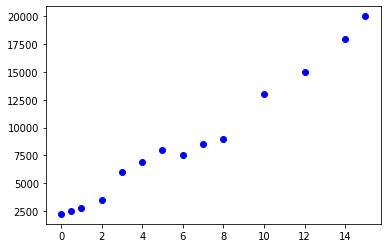

In [4]:
plt.plot(data['experience'],data['salary'],"ro",color='b')
plt.xlabel='experience'
plt.ylabel='salary'
plt.show()

### 3. Compute the score and correlation using the `LinearRegression` model

- Expected output:

```Python
>>> R sq:  0.9775283164949902
>>> Correlation:  0.9887003168275967
```

In [5]:
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(data['experience']).reshape((-1, 1))
y = np.array(data['salary'])
model.fit(x,y)
model = LinearRegression().fit(x,y)

r_sq = model.score(x,y)
print('coefficient of determination:', r_sq)

corr= data.corr()
print(corr)

coefficient of determination: 0.9775283164949902
            experience  salary
experience      1.0000  0.9887
salary          0.9887  1.0000


### 4. Predict the result of x = 11
- Expected output:

```Python
>>> Coefficient for X:  [[1138.34819698]]
>>> Intercept for X:  [1663.89519747]
>>> Regression line is: y = 1663.895197474103 + (x * 1138.3481969755721)
>>> Value of y is: 14181
>>> The predicted value y is: [[14185.72536421]]
```

In [6]:
def y(x):
    return model.intercept_+((x[0])[0])*model.coef_[0]

In [7]:
x=[[11]]
print('Coefficients: \n', model.coef_)
print('intercept:', model.intercept_)
print('y=',model.intercept_,'+x*',model.coef_[0])
print('y=',y(x))
y_pred = [model.predict(x)]
print('predicted value is :', y_pred, sep='\n')

Coefficients: 
 [1138.34819698]
intercept: 1663.895197474103
y= 1663.895197474103 +x* 1138.3481969755721
y= 14185.725364205397
predicted value is :
[array([14185.72536421])]


### 5. Plot both y_head (predicted values) and deneyim data
- Input:
```python
>>> # visualize line
>>> array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)  # deneyim
```

- Expected output:
    
![experience2](../data/experience2.png)

C:\Users\media\AppData\Local\Temp/ipykernel_38328/2731372591.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(data['experience'],data['salary'],"ro",color='b')


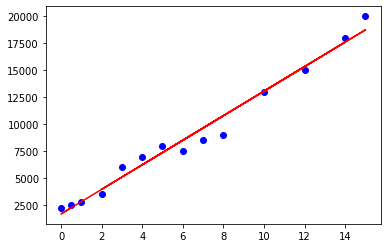

In [8]:

x = np.array(data['experience']).reshape((-1, 1))
y = np.array(data['salary'])
plt.plot(data['experience'],data['salary'],"ro",color='b')
regressor =LinearRegression()
regressor.fit(x,y)
y_pred=regressor.predict(x)
plt.plot(x,y_pred,color='red')
plt.show()


### 6. Predict values of deneyim input data and compute the r square score using `r2_score()` function

- Expected output:
```python
>>> r_square score:  0.9775283164949902
```

In [9]:
from sklearn.metrics import r2_score
print(r2_score(y,y_pred))

0.9775283164949902



<a class="anchor" id="2."></a> 
# Support Vector Regression

In [1]:
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import mean_squared_error

In [2]:
data= pd.read_csv('C:\\Users\\media\\Desktop\\python-for-finance\\python-for-finance\\day_07\\data\\salary.csv')

### 1. Print info and first 5 rows

In [3]:
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            10 non-null     object
 1   Education level  10 non-null     int64 
 2   salary           10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


,title,Education level,salary
0,Cayci,1,2250
1,Secretary,2,2500
2,Assistant Specialist,3,3000
3,Expert,4,4000
4,Project manager,5,5500


### 2.  Plot the salary over the education level

- Expected output:

![salary1](../data/salary1.png)

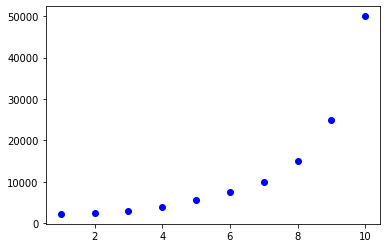

In [56]:
x=data['Education level'].values
x=np.array(x).reshape(-1,1)
y=data['salary'].values
y=np.array(y).reshape(-1,1)
plt.plot(x,y,"ro",color='b')
plt.xlabel=('Educational level')
plt.ylabel=('Salary')
plt.show()

### 3. Compute the score using `SVR` model (rbf as kernel), and plot the predicted values

- Expected output:

![salary1](../data/salary2.png)

```python
>>> R sq:  0.7513836788854973
```

SVR()


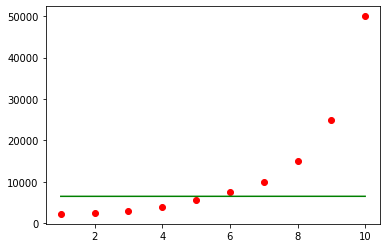

In [65]:
svr= SVR(kernel='rbf').fit(x,y)
print(svr)
yfit=svr.predict(x)
yfit=np.array(yfit).reshape(-1,1)
plt.plot(x,y,"ro",color='r')
plt.plot(x,yfit,color='g')

# Classification
<a class="anchor" id="3."></a> 
# K-Nearest Neighbour (KNN) Classification

In [14]:
# import library

In [67]:
data= pd.read_csv('C:\\Users\\media\\Desktop\\python-for-finance\\python-for-finance\\day_07\\data\\data-classification.csv')
print(data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

### 1. Drop the `id` and `Unnamed: 32` columns 

In [73]:
data = data.dropna(axis=1)
data=data.drop('id',axis=1)
print(data)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

### 2. Plot `texture_mean` over `radius_mean` for both benign and malignant diagnosis

- Expected output:
![radius](../data/radius.png)

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

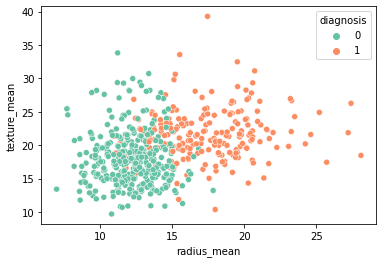

In [93]:
X = data.iloc[:, [2, 3]].values
sns.scatterplot(x="radius_mean", y="texture_mean",hue="diagnosis",data=data,palette="Set2")

### 3. Comment the code below

> Your answer here


In [94]:
# %%converting the dignosis variable from categorical to numerical
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)
# %%normlize x
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

### 4. Split your data into train and test subsets using `train_test_split()` (30% for testing)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=99)

### 5. KNeighborsClassifier model
    a. Comment the code below
- Input:
```python
# knn model
>>> from sklearn.neighbors import KNeighborsClassifier
>>> knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
>>> knn.fit(x_train,y_train)
>>> prediction = knn.predict(x_test)
>>> print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))
```
> Your answer here

    b. Use the previous code to find the best k value
    
        - Expected ouput:
![kvalue](../data/kvalues.png)
    
    c. Use the best k value and compute the score
        - Expected ouput:

```python
>>>  3 nn score: 0.9649122807017544 
```

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print(" {} nn score: {} ".format(3,knn.score(X_test,y_test)))

 3 nn score: 1.0 


### Plot the confusion matrix

- Expected output:
![matrix](../data/confusion-matrix.png)

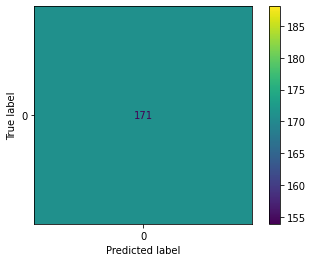

In [112]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test) 


<a class="anchor" id="4."></a> 
# Support Vector Machine (SVM) Classification

### 1. Comment the code below
> Your answer here

In [100]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)
# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

### 2.  Use the same splitted data as before and use SVC model to compyte the new score

- Expected output:
```python
>>> print accuracy of svm algo:  0.9649122807017544
```

In [109]:
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=99)
classifier = svm.SVC(kernel='rbf')
 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: The number of classes has to be greater than one; got 1 class

### 3. Plot the confusion matrix
- Expected output:

![confusion-matrix](../data/confusion-matrix-svm.png)

In [ ]:
# Your code here

# Clustering
<a class="anchor" id="5."></a> 
# K-Means Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %% create dataset
# class1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# class2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# class3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

### 1. Concatenating arrays:
    - x1, x2, x3 to create x array
    - y1, y2, y3 to create y array

In [ ]:
# Your code here

### 2. Create new dataframe using x and y arrays

- Expected output:
```python
>>>           x          y
>>> 0  31.156168  31.733629
>>> 1  23.429376  35.245182
>>> 2  18.648253  28.094688
>>> 3  31.002996  18.067875
>>> 4  20.030422  26.872852
```

In [ ]:
# Your code here

### 3. Plot the data

- Expected output:

![kmeans](../data/kmeans-assignment1.png)

In [ ]:
# Your code here

### 4. Using KMeans compute the WCSS for k=1,...k=15 and plot the it
- Expected output:

![kmeans](../data/kmeans-assignment2.png)    

In [ ]:
# Your code here

### 5. Using k=3 predict the data clusters
- Expected output:
![kmeans](../data/kmeans-assignment3.png)    

In [ ]:
# Your code here


<a class="anchor" id="6."></a> 
# Principal Component Analysis (PCA)

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# %%
iris = load_iris()

feature_names = iris.feature_names
y = iris.target

data = pd.DataFrame(iris.data,columns = feature_names)
data["sinif"] = y

x = iris.data
print(data.info())
print(data.head())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   sinif              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   sinif  
0      0  
1      0

In [ ]:
#%% PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten= True )  # whitten = normalize
pca.fit(x)

x_pca = pca.transform(x)

print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.92461872 0.05306648]
sum:  0.9776852063187949


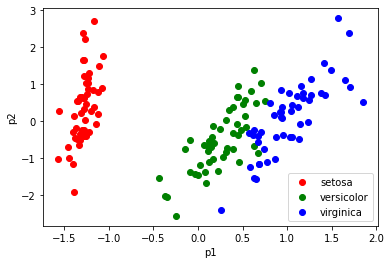

In [ ]:
#%% 2D
data["p1"] = x_pca[:,0]
data["p2"] = x_pca[:,1]

color = ["red","green","blue"]

import matplotlib.pyplot as plt
for each in range(3):
    plt.scatter(data.p1[data.sinif == each],data.p2[data.sinif == each],color = color[each],label = iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.savefig("../data/pca.png")

plt.show()